### Домашнее задание

Посчитать tpr и fpr в ноутбуке с лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами

Потроить график Precision - Recall на этих же данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
# Формируем набор признаков и целевую переменную
X = data[data.columns[:-1]]
Y = data['affair']

# Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Строим модель
model = LogisticRegression()

# Обучаем модель
model.fit(X_train, Y_train)

# Получаем прогнозные значения модели (переменная predictions)
predictions = model.predict_proba(X_test)

# Проверяем модель на тестовых данных
model.score(X_test, Y_test)

0.7319371727748691

### Оценка качества модели

In [4]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [5]:
# Считаем accuracy модели
(tp + tn) / (tp + fp + fn + tn)

0.7319371727748691

In [6]:
# Считаем precision
precision = tp / (tp + fp)
precision

0.6330532212885154

In [7]:
# Считаем recall 
recall = tp / (tp + fn)
recall

0.3723228995057661

### Используем готовые библиотеки

In [8]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [9]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

Text(0, 0.5, 'Recall')

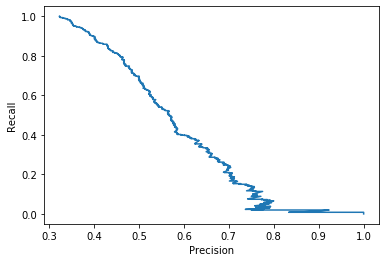

In [10]:
plt.plot(pr, re)
plt.xlabel('Precision')
plt.ylabel('Recall')

In [11]:
from sklearn.metrics import average_precision_score

In [12]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5761329928884336

### ROC

In [13]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [14]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

Text(0, 0.5, 'True Positive Rate')

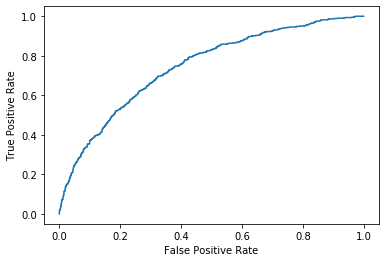

In [15]:
plt.plot( fpr, tpr )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Посчитаем параметры FPR и TPR, Precision и Recall вручную

In [16]:
tpr_manual = []
fpr_manual = []
precision_manual = []
recall_manual = []

Thres = np.linspace(1.0, 0.0, num=100, endpoint=True)
for threshold in Thres:
    tp_m = 0 # True positive_manual
    fp_m = 0 # False positive_manual
    fn_m = 0 # False negative_manual
    tn_m = 0 # True negative_manual
    for predicted_prob, actual in zip(predictions[:, 1], Y_test ):    
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0
        if predicted == 1:
            if actual == 1:
                tp_m += 1
            else:
                fp_m += 1
        else:
            if actual == 1:
                fn_m += 1
            else:
                tn_m += 1
    # метрики
    tpr_manual.append( tp_m / (tp_m + fn_m) )
    fpr_manual.append( fp_m / (fp_m + tn_m) )
    recall_manual.append( tp_m / (tp_m + fn_m) )
    if (tp_m + fp_m) != 0:
        precision_manual.append( tp_m / (tp_m + fp_m) )
    else:
        precision_manual.append(None)

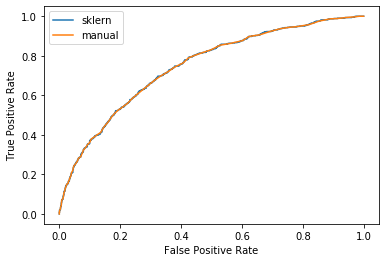

In [17]:
plt.plot(fpr, tpr, label = 'sklern')
plt.plot(fpr_manual, tpr_manual, label = 'manual')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

In [18]:
square_roc = 0
for i in range(len(fpr_manual) - 1):
    square_roc += 0.5 * (tpr_manual[i+1] + tpr_manual[i]) * (fpr_manual[i+1] - fpr_manual[i])
print('Площадь под кривой Manual: ', square_roc)
print('Площадь под кривой Roc_auc_score: ', roc_auc_score( Y_test, predictions[:, 1] ))

Площадь под кривой Manual:  0.7450326897376602
Площадь под кривой Roc_auc_score:  0.7451629176618145


#### Мы  убедились, что график ROC AUC получается очень близким к постороенному штатными средствами.

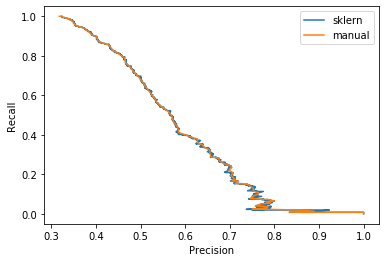

In [19]:
plt.plot(pr, re, label = 'sklern')
plt.plot(precision_manual, recall_manual, label = 'manual')

plt.xlabel('Precision')
plt.ylabel('Recall')

plt.legend()
plt.show()

#### График Precision - Recall так же очень близок к постороенному штатными средствами.